# Day 13 Pre-Class Assignment: Ordinary Differential Equations II
### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>


## Goals of this assignment

The goals of this assignment are:

* Learn about how to solve higher-order differential equations
* Descent method (and other methods for solving differential equations)

## Assignment instructions

Upload the assignment to Gradescope before 11:50PM the day before the next class and fill out the pre-class survey.

---
## Part 1: Higher-Order Differential Equations
So far, we have looked at first-order differential equations, but first-order equations are quite rare in physics.
Many, perhaps most of the equations encountered in physics are second-order or higher.
Luckily, now that we know how to solve first-order equations, solving second-order (or higher) ones is pretty easy, because of the following trick.

### 1.1 Second-order differential equations
Consider first the simple case where there is only one dependent variable $x$.
The general form of a second-order differential equation with one variable is

$$ \frac{d^2x}{dt^2} = f\left(x,\frac{dx}{dt},t\right)$$

We can define

$$\begin{align}
\frac{dx}{dt} &= y \\
\frac{dy}{dt} &= f\left(x,y,t\right)
\end{align}$$

Now, the second-order differential equations are reduced to two simultaneous first-order equations that we know how to from solve in the previous in-class notebook.

### 1.2 Higher-order differential equations
We can repeat the same trick for higher-order equations.
For example, a third-order differential equation is

$$ \frac{d^3x}{dt^3} = f\left(x,\frac{dx}{dt}, \frac{d^2x}{dt^2},t\right).$$

Rearrange in terms of two new variables:

$$\begin{align}
\frac{dx}{dt} &= y \\
\frac{dy}{dt} &= z \\
\frac{dz}{dt} &= f\left(x,y,z,t\right).
\end{align}$$

Once again, we can solve one third-order  differential equation with three simultaneous first-order equations.
One can continue the above approach to even higher orders, although the equations of order higher than three are rare in physics.

### 1.3 Higher-order differential multi-variable equations
The method can be generalized in a straightforward manner to equations with more than one variable.
The variables become vectors, but the basic equations are the same as above.
A set of simultaneous second-order equations can be written in vector form as

$$  \frac{d^2 \mathbf{r} }{d t^2} = \mathbf{f} \left(\mathbf{r},\frac{d \mathbf{r} }{d t}, t\right),$$

which is equivalent to sets of first-order equations:

$$\begin{align}
\frac{d \mathbf{r} }{d t} &=  \mathbf{s} \\
\frac{d \mathbf{s} }{d t} &= \mathbf{f} (\mathbf{r},\mathbf{s} , t)
\end{align}$$

If we started off with two simultaneous second-order equations, we would end up with four simultaneous first-order equations.
More generally, an initial system of $n$ equations of $m$th order becomes a system of $m \times n$ simultaneous first-order equations, which we can solve by the standard methods.

### 1.4 A physics example
A standard problem in physics is the linear pendulum, where you approximate the behavior of a pendulum by a linear differential equation that can be solved exactly.
However, a real pendulum is nonlinear.
Consider a pendulum with an arm of length $l$ holding a bob of mass $m$ as shown in the figure below:

https://mathematicalgarden.files.wordpress.com/2009/03/pendulum-definition1.png?w=300&h=229
  
In terms of the angle $\theta$ of displacement of the arm from the vertical, the acceleration of the mass is

$$l \frac{d^2 \theta}{dt^2}$$

in the tangential direction.
Meanwhile the force on the mass is vertically downward with magnitude $mg$ where $g=9.98 \text{ ms}^{-2}$ is the acceleration due to gravity.
For simplicity, we are ignoring friction and assuming the arm to be massless.

The component of this force in the tangential direction is $mg\sin(\theta)$, always toward the rest point at $\theta=0$, so Newton's second law gives us an equation of motion for the pendulum of the form

$$ m l \frac{d^2 \theta}{dt^2} = -mg \sin(\theta) $$

or equivalently

$$ \frac{d^2 \theta}{dt^2} = -\frac{g}{l} \sin(\theta) $$
  
Because it is nonlinear, it is not easy to solve this equation analytically, and no exact solution is known.
On the other hand, a numerical solution on the computer is straightforward.

We first use the trick to transform the second-order equation into two first-order equations by defining a new variable

$$ \frac{d \theta}{dt} = \omega $$

and

$$ \frac{d\omega}{dt} = -\frac{g}{l} \sin(\theta). $$

Now, we combine the two variables $\theta$ and $\omega$ into a single vector $\mathbf{r} = (\theta,\omega)$ and apply the 4th-order Runge-Kutta method in its vector form to solve two equations simultaneously.
In the end, we are only interested in the solution for $\theta$.

### 1.4.1 Complete the $\mathbf{f}$ function
The steps toward solving the equations are similar to the example shown in the previous in-class notebook.
First we need to redefine the $\mathbf{f}$ function.

In [4]:
# complete the code below

import numpy as np
l = 0.1 # in m; the arm of the pendulum is 10cm long
g = 9.81 # in m/s^2
def f(r, t):
    theta = r[0]
    omega = r[1]
    dtheta_dt = omega # \frac{d\theta}{dt}
    domega_dt = -(g / l) * np.sin(theta) # \frac{d\omega}{dt}
    return np.array([dtheta_dt,domega_dt], float)

 ### 1.4.2 Solve the equations

Now, write code below to solve the two first-order equations using the fourth-order Runge--Kutta method.

_Hint: You can find an example of how to solve multi-variable first-order equations in a previous in-class notebook. You can copy-paste and reuse most of that code._

Use your program to calculate the displacement angle $\theta$ for several periods of the pendulum, when it is released from a standstill at $\theta=179^\circ$ from the vertical.  
  
Make a graph of $\theta$ as a function of time.

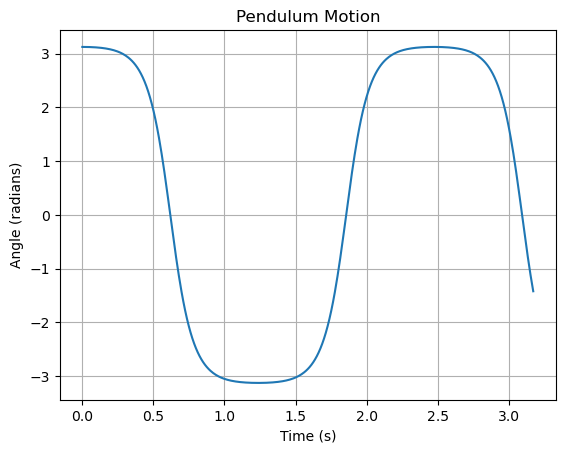

In [5]:
# put your code here

import numpy as np
import matplotlib.pyplot as plt

# initial condiitons
l = 0.1  # arm length [m]
g = 9.81  # acceleration [m/s^2]
theta0 = 179 * np.pi / 180  # initial angle [radians]
omega0 = 0.0  # initial angular velocity [rad/s]

# time parameters
T = 2 * np.pi * np.sqrt(l / g)  # period of the pendulum
a = 0.0  # starting time
b = 5 * T  # ending time

# function to calculate derivatives
def f(r, t):
    theta = r[0]
    omega = r[1]
    dtheta_dt = omega
    domega_dt = -(g / l) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt], float)

# using the Runge-Kutta method
def runge_kutta(h, N):
    tpoints = np.arange(a, b, h)
    xpoints = []
    r = np.array([theta0, omega0], float)
    for t in tpoints:
        xpoints.append(r[0])
        k1 = h * f(r, t)
        k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
        k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
        k4 = h * f(r + k3, t + h)
        r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return tpoints, xpoints

# number of steps
N = 500
h = (b - a) / N

# calculating the results
tpoints, xpoints = runge_kutta(h, N)

#plotting the results
plt.plot(tpoints, xpoints)
plt.xlabel('Time (s)')
plt.ylabel('Angle (radians)')
plt.title('Pendulum Motion')
plt.grid()
plt.show()

------
# Part 2: Methods for Solving Differential Equations

## 2.1 Secant method
You will be given code to use secant method for the in-class assignment to solve for energy eigenvalues.
Watch the following video to prepare yourself for the in-class activities.

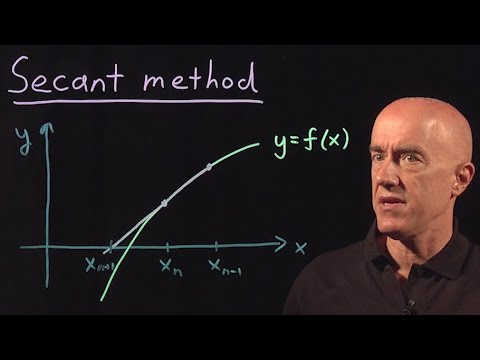

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("Zz8AYQ8c5-U",width=640,height=340)
# Direct link on YourTube: https://www.youtube.com/watch?v=Zz8AYQ8c5-U



## 2.2 (Optional) Other methods for differential equations

There are other methods used to solve differential equations that we don't have time to cover in this class.
If you are interested, you can read more about them in Chapter 8 in https://github.com/CompPhysics/ComputationalPhysics/blob/master/doc/Lectures/lectures2015.pdf
This covers techniques such as:
 * Verlet algorithm
 * Leapfrog algorithm
 * Predictor-corrector method

---
## Assignment Wrap-up

Please fill out the pre-class survey Google Form and submit your notebook in ipynb format to Gradescope.
